# Data Visualizations


In [1]:
from tmc.dynamic_join import csv_to_df
import tmc.data_viz_tools as viz

In [2]:
# Temporary imports
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from functools import reduce
import plotly.express as px

Initialize the dataframe

In [3]:
df = csv_to_df("tmc/data/full_dfs/")
df.head()

,link,date,time_hour,time_min,title,perex_short,premium,video,gallery,perex_full,word_counter,authors_hash,topics
0,/zpravy/domaci/dopady-koronavirus-zdravi-covid...,2020-07-16,16,56,"[depres, epidemi, nedostatek, počet, psychiatr...","[hovor, koronavir, krih, link, odbavit, procen...",False,False,False,"[adam, duševn, duševn, duševn, dvacet, hovor, ...","{'sebevražd': 11, 'duševn': 8, 'podl': 8, 'kri...",[-6719668756226461258],"[duševní zdraví, koronavirus, adam vojtěch, ma..."
1,/sport/basket/elena-delle-donneova-washington-...,2020-07-16,16,50,"[brát, denn, emancip, hvězd, mít, pilulek, svů...","[bát, nemuset, peníh, rozhodnout, skutečn, svo...",False,False,False,"[basketbal, borelióz, bát, chronick, covid, de...","{'aby': 4, 'dell': 3, 'donne': 3, 'mok': 3, 's...",[2033793906022324574],"[lymeská borelióza, elena delle donneová, koro..."
2,/ekonomika/doprava/trump-investice-hedgeovy-fo...,2020-07-16,12,35,"[finančník, pandemi, požehnán, trump, zlehčová...","[brát, donald, investor, on, koronavir, mít, p...",False,False,False,"[axon, brát, capital, donald, dlouh, dík, fond...","{'ten': 8, 'svůj': 5, 'začátek': 4, 'trump': 3...",[-2626469743123943962],"[investor, donald trump, fond, koronavirus, čí..."
3,/oh/tokio-2021/ekonom-andrew-zimbalist-prognoz...,2020-07-16,12,0,"[hra, muž, nespas, olympiád, propočítáv, stříd...","[boj, cen, chvíl, menš, posledn, rad, raděj, t...",True,False,False,<NA>,<NA>,<NA>,<NA>
4,/onadnes/moda/moda-zahranici-skola-navrhari-ke...,2020-07-16,12,0,"[dát, já, mít, návrhář, výhod, zahranič, česk,...","[central, dokonč, kter, londýnsk, martins, pro...",True,False,False,<NA>,<NA>,<NA>,<NA>


Our sample time period:

In [4]:
print(df.date.min().strftime("%Y-%m-%d"), "-", df.date.max().strftime("%Y-%m-%d"))
print("Number of articles:", df.shape[0])

2020-06-17 - 2020-07-16
Number of articles: 468


## Wordcloud

Sum all Counter objects into one to find the most frequent words and then plot a wordcloud.


In [5]:
# Remove ordinary words which have somehow gone through the filters
ordinary_words = ["být", "se", "ten", "on", "jak", "tak", "aby", "až", "podl"]
all_words = viz.create_all_words(df, ordinary_words)
   
all_words.most_common(10)


[('člověk', 709),
 ('koronavir', 611),
 ('mít', 468),
 ('test', 462),
 ('případ', 438),
 ('rok', 407),
 ('dalš', 350),
 ('česk', 340),
 ('nov', 335),
 ('covid', 309)]

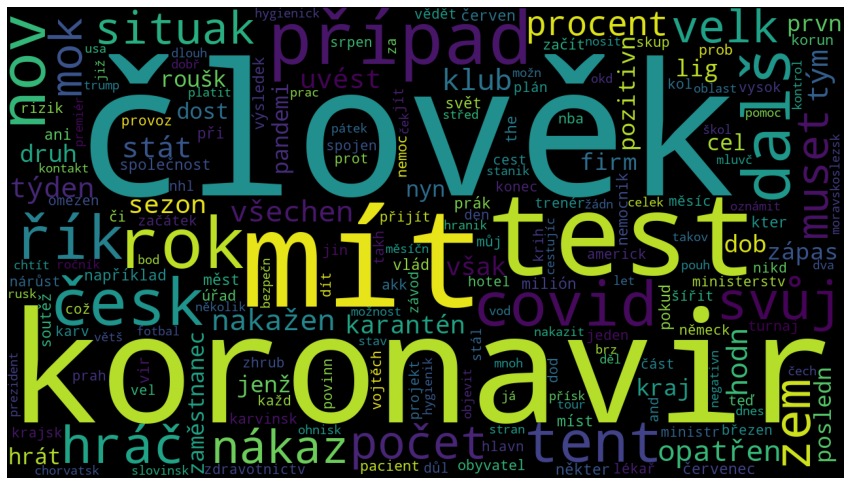

In [6]:
viz.basic_wordcloud(all_words)

## Words by hour

In this [interactive chart](https://plotly.com/python/sliders/), we firstly create a long dataframe where, for hours between 6:00 - 20:00, the top 10 words are saved together with their count. Then, we use `plotly` to generate a barplot for each hour.

In [7]:
hourly_df = viz.create_hourly_df(df, ordinary_words)
hourly_df.head()


,hour,word,frequency
0,6,případ,41
1,6,člověk,31
2,6,koronavir,26
3,6,nov,20
4,6,nákaz,20


In [9]:
viz.hourly_words_barplot(hourly_df, y_range=[0, 80])